# Weather Analysis of LA Crimes in 2015

In [60]:
#import dependencies
import pandas as pd
import requests
import json
import warnings
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pprint import pprint
warnings.filterwarnings("ignore")

csv_path = "Cleaned_Crime_data.csv"
crimes= pd.read_csv(csv_path)


In [59]:
#Subset crimes we are focusing on 
crime_subset = crimes[(crimes["Crime Code Description"] == "CRIMINAL HOMICIDE") |(crimes["Crime Code Description"] == "ARSON") |(crimes["Crime Code Description"] == "KIDNAPPING")|(crimes["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE") |(crimes["Crime Code Description"] == "PICKPOCKET")]
crime_subset["Datetime"] = pd.to_datetime(crime_subset["Date Occurred"])
crime_subset["Datetime"] = crime_subset["Datetime"].astype("str")


# Use Meteo API to fetch Historical Weather Data for each data point 

In [42]:
print("Beginning Temperature Fetching Process")
for index, row in crime_subset.iterrows():
    lat = crime_subset.loc[index,"Lat"]
    lon = crime_subset.loc[index,"Lon"]
    date = crime_subset.loc[index,"Datetime"]
    query_url = f"{url}latitude={lat}&longitude={lon}&start_date={date}&end_date={date}&timezone=auto&daily=temperature_2m_max"
    
    response = requests.get(query_url).json()
    print("Fetching temperature....")
    try:
        crime_subset.loc[index,"Daily Max Temp"] = response["daily"]["temperature_2m_max"][0]
        print("Temp found!")
    except:
        crime_subset.loc[index, "Daily Max Temp"] = "NA"
        print("Temp not found, moving on...")
print("All done!")

Beginning Temperature Fetching Process
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
Fetching temperature....
Temp found!
F

In [45]:
#Save results to csv so we don't have to run long code again
crime_subset.to_csv("Crime_with_Weather.csv")

## Weather Analysis 

In [61]:
#Read in data
weather= pd.read_csv("Crime_with_weather.csv")

In [49]:
temp_by_crime = weather.groupby("Crime Code Description").mean(numeric_only=True)["Daily Max Temp"]
temp_by_crime

Crime Code Description
ARSON                                25.456027
CRIMINAL HOMICIDE                    25.134906
KIDNAPPING                           25.736325
PICKPOCKET                           25.495503
THROWING OBJECT AT MOVING VEHICLE    25.634707
Name: Daily Max Temp, dtype: float64

<Axes: title={'center': 'Daily Max Temp'}, xlabel='Crime Code Description'>

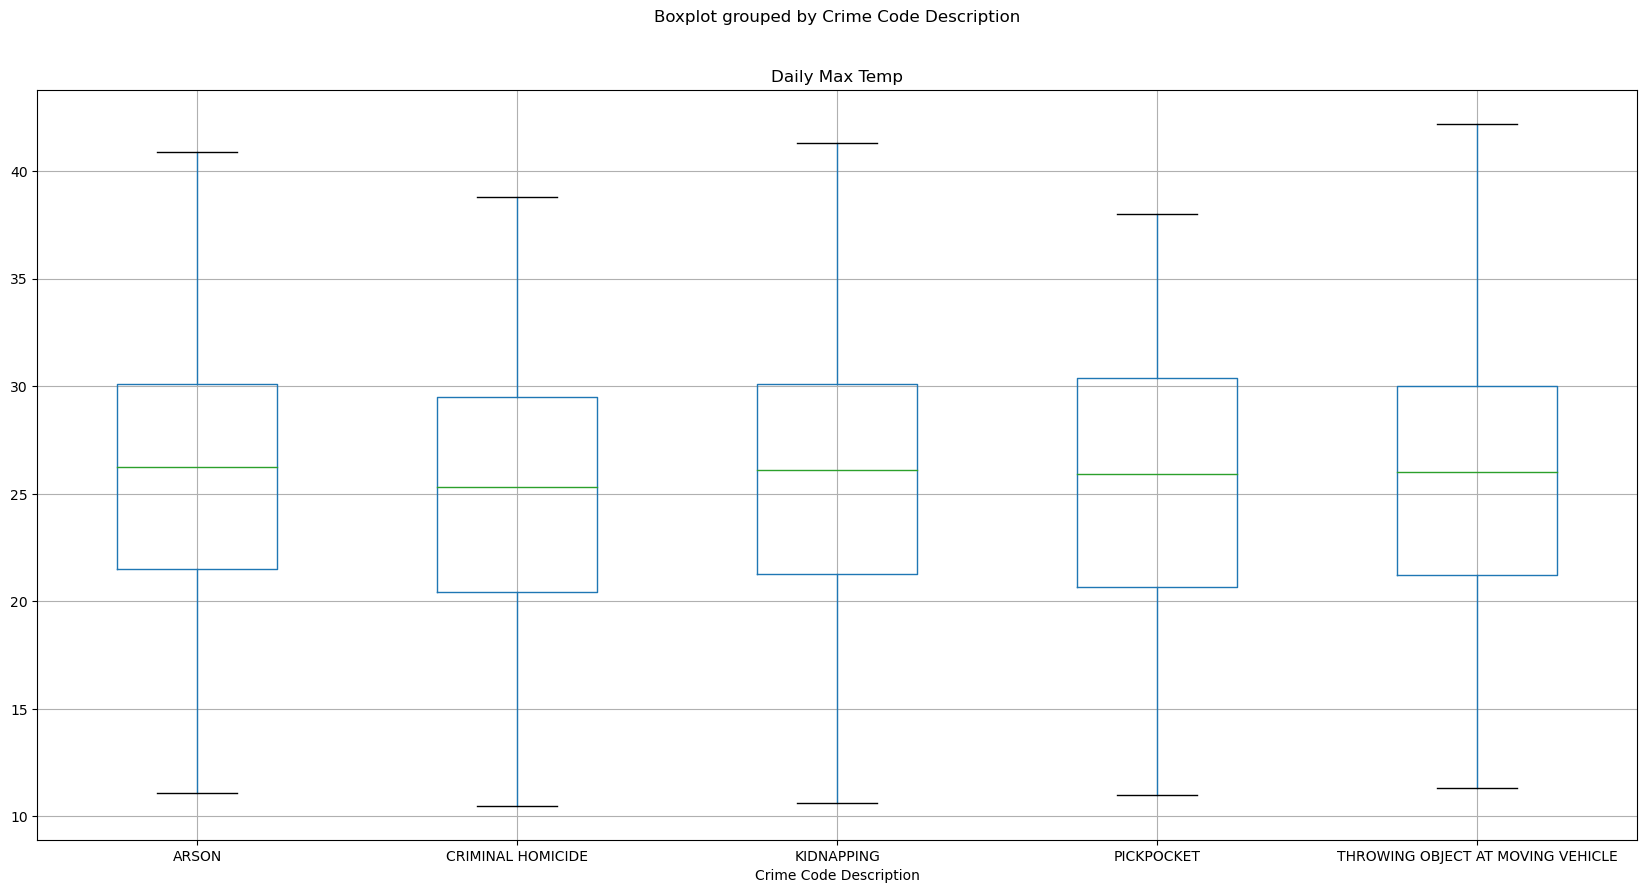

In [52]:
#Display the boxplots showing temperature distribution by type of crime
weather.boxplot("Daily Max Temp", by="Crime Code Description", figsize=(20, 10))

In [55]:
#Group data for ANOVA
group0 = weather[weather["Crime Code Description"] == "ARSON"]["Daily Max Temp"]
group1 = weather[weather["Crime Code Description"] == "CRIMINAL HOMICIDE"]["Daily Max Temp"]
group2 = weather[weather["Crime Code Description"] == "KIDNAPPING"]["Daily Max Temp"]
group3 = weather[weather["Crime Code Description"] == "PICKPOCKET"]["Daily Max Temp"]
group4 = weather[weather["Crime Code Description"] == "THROWING OBJECT AT MOVING VEHICLE"]["Daily Max Temp"]

#Perform ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)

F_onewayResult(statistic=0.8792381833114385, pvalue=0.4754509209593414)

## Does Temperature Effect Crime?

We decided to look at the hottest month in LA in 2015, which was september. Our null hypothesis is that the average temperature when these crimes were occuring was not higher or lower than the average temperature for the month of september, that would mean that the daily temp has no effect on the amount of crime happening. The hypothesis is that the daily temperatures for when each crime occured would be higher than the average temperature from the month, which was 78.7 degrees fahrenheit. Source: (https://www.laalmanac.com/weather/we04a.php)

In [58]:
sept_crimes = weather[weather["Month"]==9]
sept_temps = sept_crimes["Daily Max Temp"]
stats.ttest_1samp(sept_temps, 29.94)

TtestResult(statistic=2.1427600166706915, pvalue=0.033328703173545846, df=202)

The p-value was .03, meaning we have significant evidence to reject the null hypothesis and conclude that the temperatures during crimes were hotter on average than the average daily temperature in LA for September, 2015. 